In [ ]:
Logistic Regression Case Study

In [ ]:
Targets:
-Apply Logistic Regression model.
-Apply L2 Reguralized Logistic Regression.

In [ ]:
Step1: Load the data

In [37]:
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'Height')

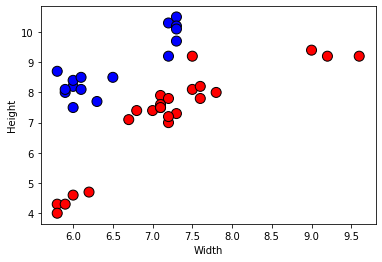

In [38]:
import numpy as np
%matplotlib inline
import pylab as plt
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

data = np.loadtxt('orange_lemon.txt', delimiter=',') # load fruit data
X = data[:,1:3]
t = data[:,0]
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold, edgecolor='k', s=100)
plt.xlabel('Width')
plt.ylabel('Height')

In [39]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


In [ ]:
Step2: Model Traning

5-fold averae CV error: 0.025000000000000022


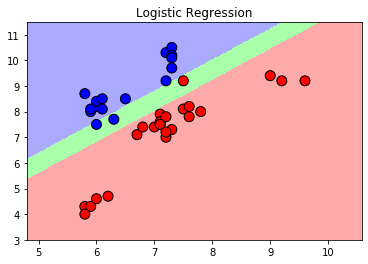

In [44]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X, t)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold,
            edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic Regression")
mean_cv_score = np.mean( cross_val_score(clf, X, t, cv=5) )
print("5-fold averae CV error:", 1-mean_cv_score)

In [ ]:
Step2: L2 Reguralized Logistic Regression.
-we apply L2 regularization on model and see what will happen

In [45]:
from sklearn.svm import l1_min_c
from sklearn.model_selection import GridSearchCV
cs = l1_min_c(X, t, loss='log')*np.logspace(0, 7, 16)
print(cs)

[2.89435601e-02 8.47653998e-02 2.48247728e-01 7.27029358e-01
 2.12921058e+00 6.23570098e+00 1.82621518e+01 5.34833516e+01
 1.56633727e+02 4.58724513e+02 1.34344105e+03 3.93446133e+03
 1.15226388e+04 3.37457135e+04 9.88292004e+04 2.89435601e+05]


5-fold averae CV error: 0.025000000000000022


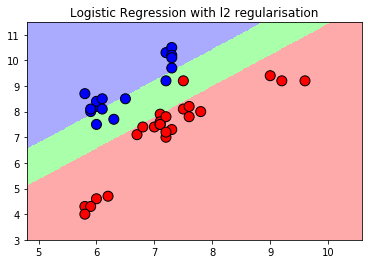

In [49]:
parameters = {'C':cs}
logit_reg =  LogisticRegression(penalty='l2', tol=1e-5, max_iter=1e4)
clf = GridSearchCV(logit_reg, parameters, cv=5)
clf.fit(X,t)

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape) # Put the result into a color plot
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold, edgecolor='k', s=100) # Plot also the training points
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic Regression with l2 regularisation")
print("5-fold averae CV error:", 1-clf.best_score_)
